# 손글씨 숫자 식별 모델
---
- 데이터 : MNIST 데이터 사용
- 학습모델 : 신경망 모델
- 동작 : 0 ~ 9 사이 숫자 판별

In [1]:
import tensorflow as tf

In [2]:
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## [1] 데이터 로딩 및 준비


In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

# 검증용 데이터 셋 준비
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, stratify=y_train, random_state=72
)

print(f"X_train.shape :{X_train.shape}, X_test.shape :{X_test.shape}, X_val.shape :{X_val.shape}")

11501568/11490434 [==============================] - 0s 0us/step
X_train.shape :(45000, 28, 28), X_test.shape :(10000, 28, 28), X_val.shape :(15000, 28, 28)


## [2] 데이터 전처리
---
- 수치 데이터 -> 스케일링
- 범주형 데이터 -> 원핫인코딩

In [4]:
# 이미지 데이터의 픽셀값 즉 특성 0.0 ~ 1.0 으로 스케일링
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

In [5]:
# 타겟 라벨 -> OneHotEncoding으로 변환
ohe = OneHotEncoder()

y_train = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()
y_val = ohe.fit_transform(y_val.reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(y_test.reshape(-1, 1)).toarray()

In [6]:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)
X_val = X_val.reshape(-1, 28 * 28)

## [3] 모델 생성
---
- (1) 모델 구성
- (2) 모델 생성

### [3-1] 모델 구성
---
- 입력 데이터 : 784 -> 28 * 28 이미지 데이터
- 출력 데이터 : 10  -> 0 ~ 9 숫자 라벨
- 학습 방법 : 분류 -> 다중분류

In [7]:
model = Sequential(name="MNIST_model")

model.add(Dense(250, activation="relu", input_shape=(784,), name="Input"))
model.add(Dropout(0.4))
model.add(Dense(150, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation="softmax", name="Output"))

In [8]:
model.summary()

Model: "MNIST_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 250)               196250    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense (Dense)               (None, 150)               37650     
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 250,010
Trainable params: 250,010
Non-tra

### [3-2] 모델 생성
---
- loss 함수
- optimizer 기법
- metrics 평가항목

In [9]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics="accuracy"
)

## [4] 학습

In [10]:
from keras.callbacks import EarlyStopping

stop_cb = EarlyStopping(monitor="val_loss", patience=4)

In [11]:
from keras.callbacks import ModelCheckpoint

model_cb = ModelCheckpoint(filepath="/content/drive/MyDrive/Colab Notebooks/python-mldlnl/deep-learning/Model", save_best_only=True, save_weight_only=True)

In [12]:
with tf.device("/device:GPU:0"):
    his = model.fit(
        X_train,
        y_train,
        epochs=50,
        verbose=0,
        validation_data=(X_val, y_val),
        callbacks=[stop_cb, model_cb]
    )

In [13]:
# 학습 진행 결과 시각화
import matplotlib.pyplot as plt

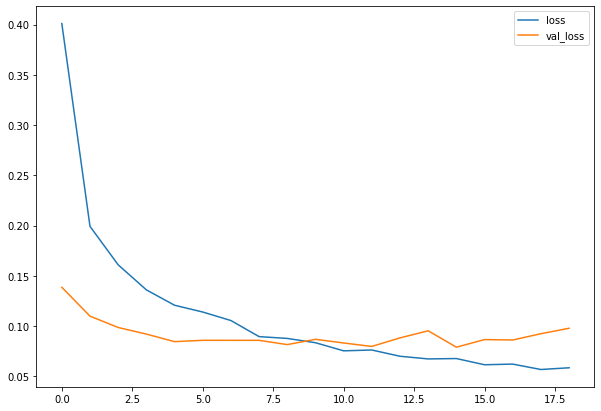

In [14]:
plt.figure(figsize=(10, 7))
plt.plot(his.epoch, his.history['loss'], label="loss")
plt.plot(his.epoch, his.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

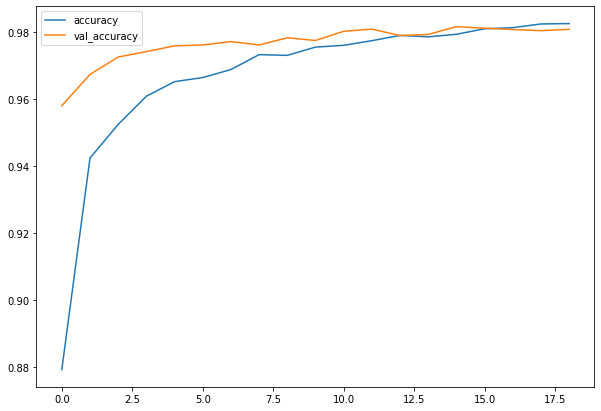

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(his.epoch, his.history['accuracy'], label="accuracy")
plt.plot(his.epoch, his.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

## [5] 평가
---
- evaluate() 메서드
    * test data , target
    * 반환값 : loss, metics에서 지정한 성능평가항목
     

In [16]:
test_result = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9811


In [17]:
test_result

[0.08400385081768036, 0.9811000227928162]

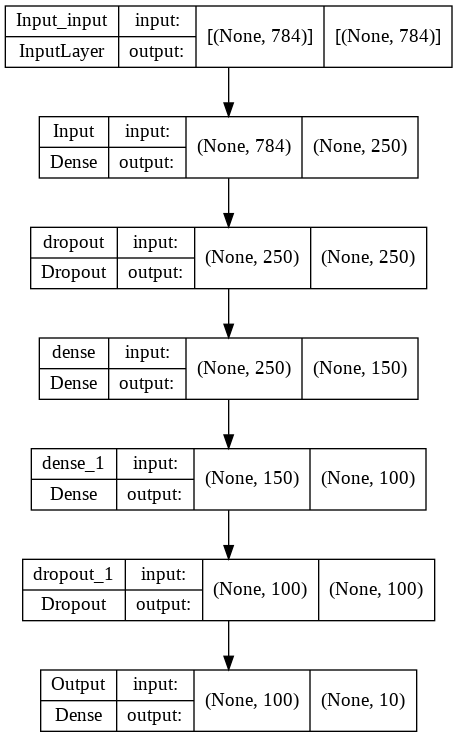

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)